In [3]:
import pandas as pd

In [4]:
from Bio.PDB import PDBParser

In [5]:
orphan = "/home/tanghan/OmegaFold/orphan_eval.csv"
PDB_path = "/home/tanghan/OmegaFold/PDB/"

In [6]:
orphan_data = pd.read_csv(orphan)

In [34]:
def add_release_date(pdb_id):
    #print(data.columns)
    #pdb_id = data['pdb_id']
    try:
        name = "pdb{}.ent".format(pdb_id.lower())
        structure = parser.get_structure("test", PDB_path+name)
        release_date = structure.header['release_date']
    #data['release_date'] = 
        #print(release_date, pdb_id)
        return release_date
    except:
       # print("PDB Not Found")
        return "NA"

In [35]:
orphan_test = orphan_data[:10]

In [40]:
orphan_data['release_date'] = orphan_data.apply(lambda df:add_release_date(df['pdb_id']), axis = 1)

/home/tanghan/.miniconda/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2808.
  warnings.warn(
/home/tanghan/.miniconda/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2813.
  warnings.warn(
/home/tanghan/.miniconda/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2828.
  warnings.warn(
/home/tanghan/.miniconda/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2842.
  warnings.warn(
/home/tanghan/.miniconda/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 11469.
  warnings.warn(
/home/tanghan/.miniconda/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain L is 

In [42]:
orphan_data.to_csv('/home/tanghan/orphan_result.csv', index=False
)

In [50]:
orphan_data['release_date']

0              NA
1      2022-04-13
2              NA
3      2020-04-15
4      2022-07-13
          ...    
692            NA
693            NA
694            NA
695            NA
696    2020-02-19
Name: release_date, Length: 697, dtype: object

In [51]:
orphan_cleansed = orphan_data.loc[orphan_data['tm_align_ref_omegafold'].notnull(), ['seq_cat', 'seq_pred_len', 'seq_ref_len', 'lddt_omegafold', 'tm_align_ref_omegafold', 'release_date']]

In [86]:
orphan_cleansed = orphan_data.loc[orphan_data['tm_align_ref_omegafold'].notnull()]

In [101]:
orphan_cleansed_2 = orphan_cleansed_2[['seq_cat', 'record', 'pdb_id', 'chain_id',
       'pdb_pred_omegafold', 'pdb_ref', 'seq_pred', 'seq_pred_len', 'seq_ref',
       'seq_ref_len', 'lddt_omegafold', 'tm_align_ref_omegafold',
       'align_length_omegafold', 'rmsd_omegafold', 'release_date']]

In [96]:
orphan_cleansed_2 = orphan_cleansed[orphan_cleansed['release_date'] != 'NA']

In [97]:
orphan_cleansed_2 = orphan_cleansed_2.sort_values(by = ['release_date'], ascending=False)[:14]

In [84]:
orphan_cleansed_2.shape

(14, 16)

In [102]:
orphan_cleansed_2.to_csv('orphan_test.csv', index=False)

In [67]:
import numpy as np
import matplotlib.pyplot as plt
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

In [ ]:
# start with a square Figure
fig = plt.figure(figsize=(8, 8))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(orphan_cleansed['seq_ref_len'], orphan_cleansed['lddt_omegafold'], ax, ax_histx, ax_histy)

plt.show()

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

[]

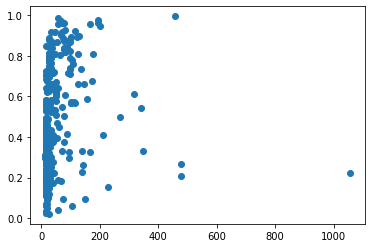

In [48]:
plt.scatter(orphan_cleansed['seq_pred_len'], orphan_cleansed['tm_align_ref_omegafold'])
plt.plot()

In [29]:
def jtplot2(seq_cat):
    p = sns.jointplot(data=orphan_cleansed[orphan_cleansed['seq_cat'] == seq_cat], 
                x="seq_pred_len", y="lddt_omegafold", dropna=True)
    p.fig.suptitle(seq_cat.split('.')[0] + ' lddt')
    #p.ax_joint.collections[0].set_alpha(0)
    p.fig.tight_layout()
    p.fig.subplots_adjust(top=0.95)


In [30]:
def jtplot(seq_cat):
    p = sns.jointplot(data=orphan_cleansed[orphan_cleansed['seq_cat'] == seq_cat], 
                x="seq_pred_len", y="tm_align_ref_omegafold", dropna=True)
    p.fig.suptitle(seq_cat.split('.')[0] + ' TM-align')
    #p.ax_joint.collections[0].set_alpha(0)
    p.fig.tight_layout()
    p.fig.subplots_adjust(top=0.95)


In [77]:
def jtplot3(seq_cat):
    p = sns.scatterplot(data=orphan_cleansed_2[(orphan_cleansed_2['seq_cat'] == seq_cat)], 
                x="lddt_omegafold", y="tm_align_ref_omegafold", 
                hue="seq_pred_len")
    p.set_title(seq_cat.split('.')[0])
    plt.show()
    #p.ax_joint.collections[0].set_alpha(0)
    #p.fig.tight_layout()
    #p.fig.subplots_adjust(top=0.95)


In [65]:
def jtplot4(seq_cat):
    data=orphan_cleansed[orphan_cleansed['seq_cat'] == seq_cat]
    plt.scatter(data["lddt_omegafold"], data["tm_align_ref_omegafold"]
                    ,c=data["seq_pred_len"], cmap = 'seismic')
    cbar = plt.colorbar()
    plt.show()
    #p.ax_joint.collections[0].set_alpha(0)
    #p.fig.tight_layout()
    #p.fig.subplots_adjust(top=0.95)


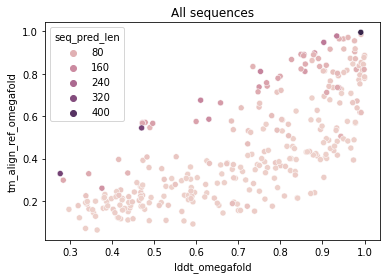

In [77]:
p = sns.scatterplot(data=orphan_cleansed[orphan_cleansed['seq_pred_len'] < 800], 
                x="lddt_omegafold", y="tm_align_ref_omegafold", 
                hue="seq_pred_len")
p.set_title("All sequences")
plt.show()

orphan_pdb.fa


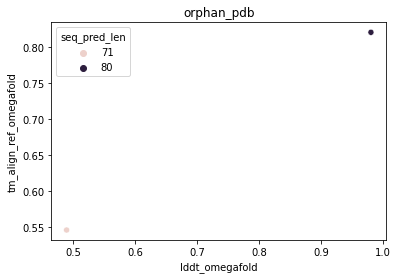

orphan_like_short_pdb.fa


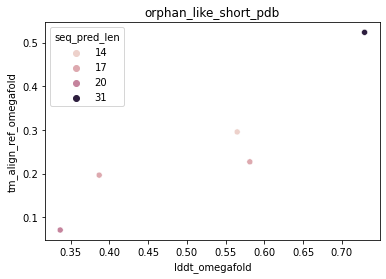

orphan_short_pdb.fa


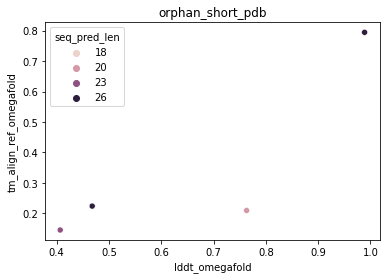

orphan_like_pdb.fasta


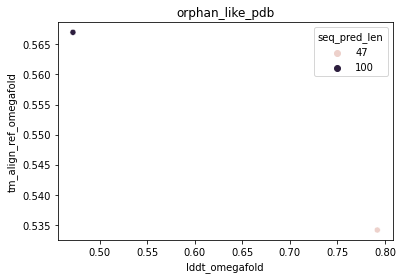

In [78]:
for dir in orphan_cleansed_2['seq_cat'].unique():
    print(dir)
    jtplot3(dir)

In [90]:
orphan_data.sort_values(by = ['lddt_omegafold'], ascending=False).head()[['pdb_pred_omegafold', 'pdb_ref', 'lddt_omegafold']]

,pdb_pred_omegafold,pdb_ref,lddt_omegafold
353,"/home/tanghan/OmegaFold/orphan_pred/6MPW_1_A,.pdb",/home/tanghan/OmegaFold/orphan_ref/6MPW_A.pdb,1.0000
483,"/home/tanghan/OmegaFold/orphan_pred/7UDV_1_A,.pdb",/home/tanghan/OmegaFold/orphan_ref/7UDV_A.pdb,1.0000
487,"/home/tanghan/OmegaFold/orphan_pred/7UDZ_1_A,.pdb",/home/tanghan/OmegaFold/orphan_ref/7UDZ_A.pdb,1.0000
556,"/home/tanghan/OmegaFold/orphan_pred/7C7Y_1_A,.pdb",/home/tanghan/OmegaFold/orphan_ref/7C7Y_A.pdb,0.9990
355,"/home/tanghan/OmegaFold/orphan_pred/6MQ2_1_A,.pdb",/home/tanghan/OmegaFold/orphan_ref/6MQ2_A.pdb,0.9986


In [1]:
from Bio.PDB import PDBParser

parser = PDBParser()

data = parser.get_structure('test', "/home/tanghan/OmegaFold/orphan_ref/5OXW_A.pdb")

In [103]:
from protein.pdb_eval import eval

In [113]:
pdb_pred = "/home/tanghan/model_2_relaxed.pdb"
pdb_ref = "/home/tanghan/hirah_tools/6bym_A.pdb"

In [114]:


eval_machine = eval(pdb_pred, pdb_ref, lddt_path="/home/tanghan/psp-pipeline/pipeline/tool/lddt-linux/lddt")

In [116]:
#print(eval_machine.tmalign()['report'])

In [4]:
sequence = "GTIDPQNSEEHPVLSRRLEN"
date = "2022-08-29"
name = "7EES_A"

In [5]:
text = "\n    \"email\": \"tanghan1995@gmail.com\",\n    \"sender\": \"cameo\",\n    \"sequence\": \"{}\",\n    \"name\": \"{}_{}\",\n    \"target\": \"{}_{}\"\n".format(sequence, date, name, date, name)

In [6]:
print("{"+text+"}")

{
    "email": "tanghan1995@gmail.com",
    "sender": "cameo",
    "sequence": "GHMGSSGGKDSLNDKDEEIKKLRGFCSRYKRENASMKERIASCEQGEQENALVMEKLMEQKMEDRKIIQSQKKAMRNVRG",
    "name": "2022-08-29_7EQB_A",
    "target": "2022-08-29_7EQB_A"
}
